# **KNN Task**

Use the Data-Frame and do the following 

1- Write python code to visualize data as the following image

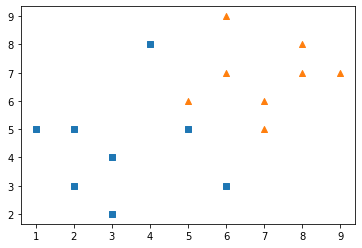

2- based on understanding of the KNN ML algorithm 

Write a programe code which do :

2.1- Set K value as input from user after run a program

2.2- Add new test value as input ( x, y )

2.3- Calculate the distance between new input and all points in Data-Frame

2.4- Sort distances 

2.5- Select K values that have a minimum distance with a new input value 

2.6- Detect the label for a new input data

2.7- Detect the pointValue for a new inout data

2.8- Insert the new inoput and the label and the valuePoint into Data-Frame

2.9- Visualize the new point with green color and suitlable mark
and plot lines between K nearest neighbors and with new input 

as this :

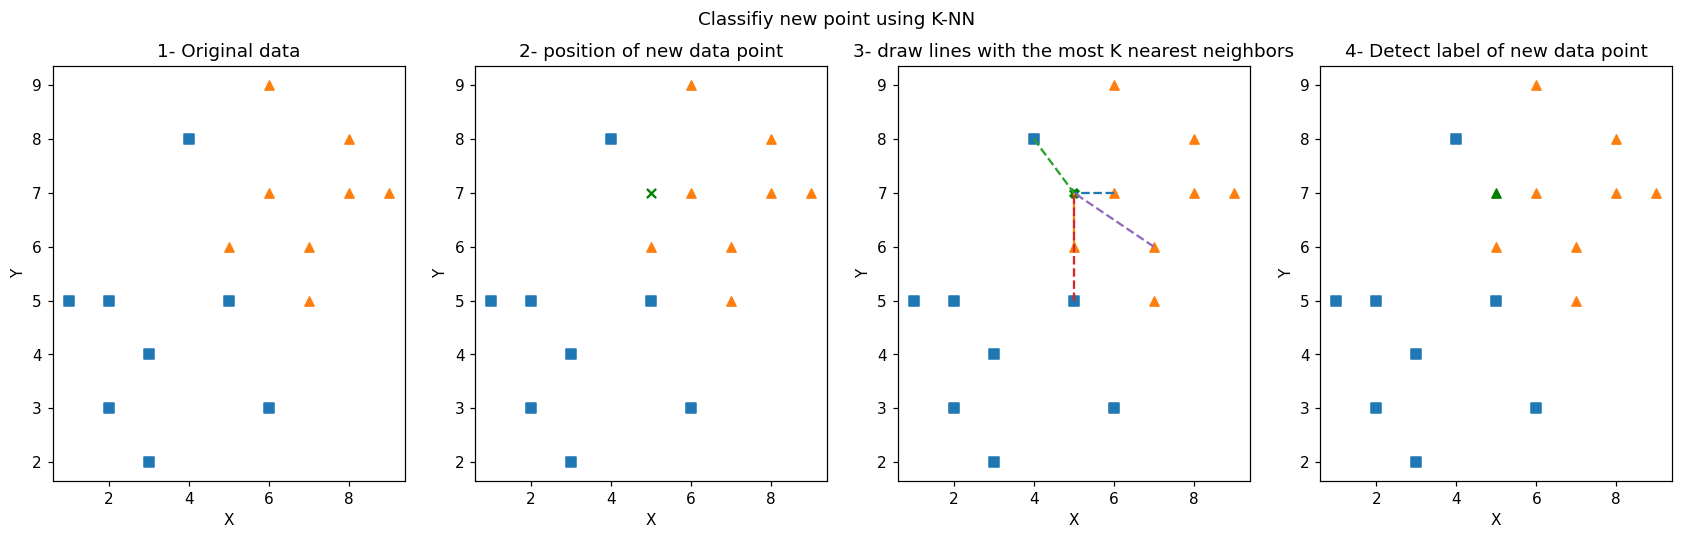

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import math

In [2]:
list_data = [[2,5, "square", 50],
             [2,3, "square", 56],
             [3,2, "square", 36],
             [3,4, "square", 80],
             [6,3, "square", 70],
             [1,5, "square", 85],
             [4,8, "square", 60],
             [5,5, "square", 83],
             [7,6, "triangle", 77],
             [6,7, "triangle", 20],
             [7,5, "triangle", 36],
             [5,6, "triangle", 56],
             [9,7, "triangle", 40],
             [8,8, "triangle", 37],
             [8,7, "triangle", 55],
             [6,9, "triangle", 41],
             ]

df = pd.DataFrame(data = list_data, columns=["x", "y", "label", "pointValue"])

In [3]:
def calculate_distance(x1, y1, x2, y2):
    return math.sqrt(math.pow(x2 - x1, 2) + math.pow(y2 - y1, 2))


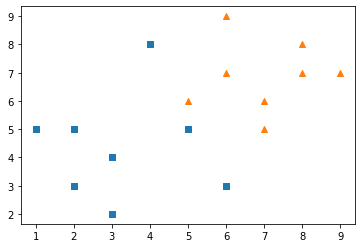

In [4]:
# 1- Write python code to visualize data as the following image
df_square = df[df['label'] == "square"]
df_triangle = df[df['label'] == "triangle"]

plt.scatter(df_square['x'], df_square['y'], marker='s')
plt.scatter(df_triangle['x'], df_triangle['y'], marker='^')
plt.show()

In [5]:
# 2.1- Set K value as input from user after run a program
k = int(input("Enter K value : "))

Enter K value : 5


In [6]:
# 2.2- Add new test value as input ( x, y )

x2 = int(input("Enter x value : "))
y2 = int(input("Enter y value : "))

Enter x value : 5
Enter y value : 7


In [7]:
df

,x,y,label,pointValue
0,2,5,square,50
1,2,3,square,56
2,3,2,square,36
3,3,4,square,80
4,6,3,square,70
5,1,5,square,85
6,4,8,square,60
7,5,5,square,83
8,7,6,triangle,77
9,6,7,triangle,20


In [8]:
77# 2.3- Calculate the distance between new input and all points in Data-Frame

df["distances"] = df.apply(lambda row: calculate_distance(row.x, row.y, x2, y2), axis=1)

df

,x,y,label,pointValue,distances
0,2,5,square,50,3.605551
1,2,3,square,56,5.000000
2,3,2,square,36,5.385165
3,3,4,square,80,3.605551
4,6,3,square,70,4.123106
5,1,5,square,85,4.472136
6,4,8,square,60,1.414214
7,5,5,square,83,2.000000
8,7,6,triangle,77,2.236068
9,6,7,triangle,20,1.000000


In [9]:
# 2.4- Sort distances

df.sort_values(by=['distances'], inplace=True)

In [10]:
df

,x,y,label,pointValue,distances
9,6,7,triangle,20,1.000000
11,5,6,triangle,56,1.000000
6,4,8,square,60,1.414214
7,5,5,square,83,2.000000
8,7,6,triangle,77,2.236068
15,6,9,triangle,41,2.236068
10,7,5,triangle,36,2.828427
14,8,7,triangle,55,3.000000
13,8,8,triangle,37,3.162278
0,2,5,square,50,3.605551


In [16]:
df[:k]["label"].value_counts().sort_values().index[-1]

'triangle'

In [17]:
# 2.5- Select K values that have a minimum distance with a new input value
# 2.6- Detect the label for a new input data

new_label = df[:k]["label"].value_counts().sort_values().index[-1]

print("new label : ", new_label)

new label :  triangle


In [18]:
# 2.7- Detect the pointValue for a new inout data

new_pointValue = df[:k]["pointValue"].mean()

print("new poinValue : ", new_pointValue)

new poinValue :  59.2


In [19]:
df

,x,y,label,pointValue,distances
9,6,7,triangle,20,1.000000
11,5,6,triangle,56,1.000000
6,4,8,square,60,1.414214
7,5,5,square,83,2.000000
8,7,6,triangle,77,2.236068
15,6,9,triangle,41,2.236068
10,7,5,triangle,36,2.828427
14,8,7,triangle,55,3.000000
13,8,8,triangle,37,3.162278
0,2,5,square,50,3.605551


In [20]:
# 2.9- Insert the new inoput and the label and the valuePoint into Data-Frame

# reset index
df.reset_index(inplace=True, drop=True)
df.loc[df.shape[0], :] = [x2, y2, new_label, new_pointValue, 0.0]

df

,x,y,label,pointValue,distances
0,6.0,7.0,triangle,20.0,1.000000
1,5.0,6.0,triangle,56.0,1.000000
2,4.0,8.0,square,60.0,1.414214
3,5.0,5.0,square,83.0,2.000000
4,7.0,6.0,triangle,77.0,2.236068
5,6.0,9.0,triangle,41.0,2.236068
6,7.0,5.0,triangle,36.0,2.828427
7,8.0,7.0,triangle,55.0,3.000000
8,8.0,8.0,triangle,37.0,3.162278
9,2.0,5.0,square,50.0,3.605551


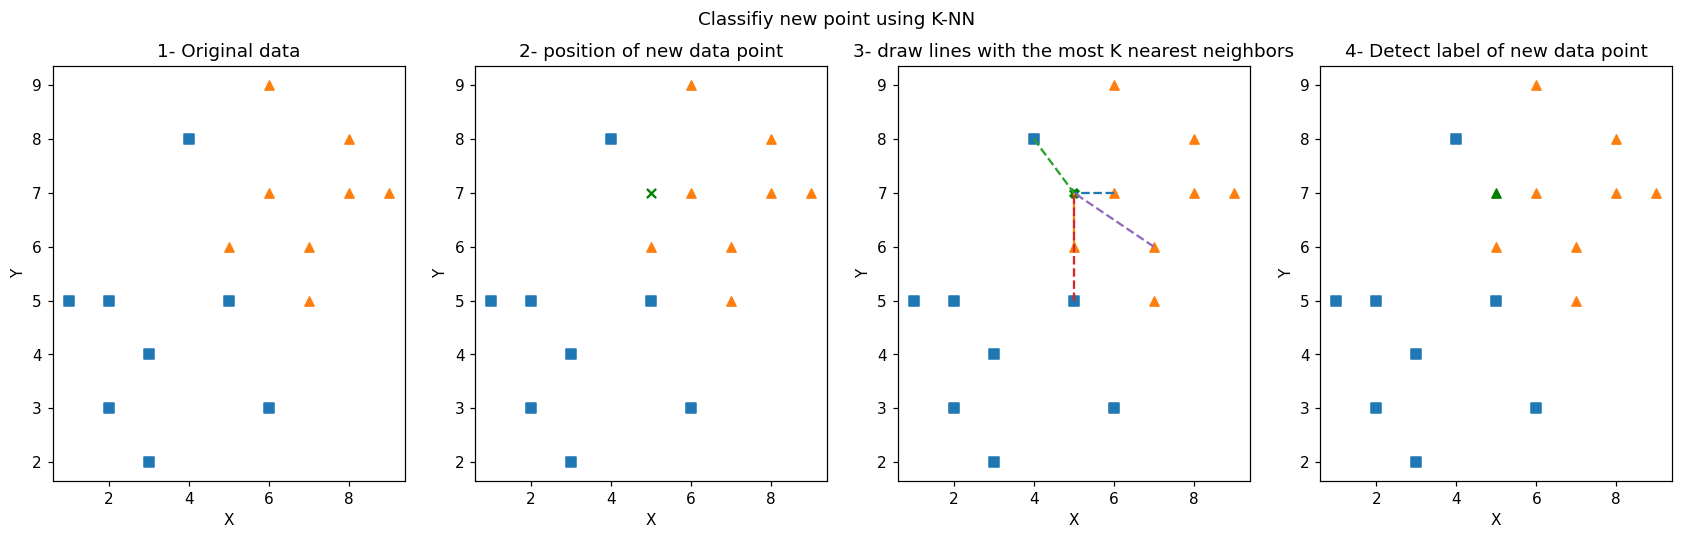

In [21]:
# 2.9- Visualize the new point with green color and suitlable mark and plot lines between K nearest neighbors and with new input

new_marker = ""
if new_label == "triangle":
    new_marker = '^'
elif new_label == "square":
    new_marker = 's'

n_rows = 1
n_cols = 4
fig = plt.figure(figsize=(19, 5), dpi=110)
fig.suptitle('Classifiy new point using K-NN')

ax1 = fig.add_subplot(n_rows,n_cols,1)
ax1.scatter(df_square['x'], df_square['y'], marker='s')
ax1.scatter(df_triangle['x'], df_triangle['y'], marker='^')
ax1.set_xlabel("X")
ax1.set_ylabel("Y")
ax1.set_title("1- Original data")


ax2 = fig.add_subplot(n_rows,n_cols,2)
ax2.scatter(df_square['x'], df_square['y'], marker='s')
ax2.scatter(df_triangle['x'], df_triangle['y'], marker='^')
ax2.scatter(x=x2, y=y2,marker="x", color="green")
ax2.set_xlabel("X")
ax2.set_ylabel("Y")
ax2.set_title("2- position of new data point")


ax3 = fig.add_subplot(n_rows,n_cols,3)
ax3.scatter(df_square['x'], df_square['y'], marker='s')
ax3.scatter(df_triangle['x'], df_triangle['y'], marker='^')
ax3.scatter(x=x2, y=y2, marker="X", color="green")

for idx, row in df.sort_values(by="distances")[1:k+1][["x", "y"]].iterrows():
    x_values = [row["x"], x2]
    y_values = [row["y"], y2]
    ax3.plot(x_values, y_values, linestyle="--")

ax3.set_xlabel("X")
ax3.set_ylabel("Y")
ax3.set_title("3- draw lines with the most K nearest neighbors")

ax4 = fig.add_subplot(n_rows,n_cols,4)
ax4.scatter(df_square['x'], df_square['y'], marker='s')
ax4.scatter(df_triangle['x'], df_triangle['y'], marker='^')
ax4.scatter(x=x2, y=y2, marker=new_marker, color="green")
ax4.set_xlabel("X")
ax4.set_ylabel("Y")
ax4.set_title("4- Detect label of new data point")

plt.subplots_adjust(wspace=0.20,
                    hspace=0.4
                    )

plt.show()